# Game Recommender System

## Library

In [668]:
# ! pip install surprise -q

In [669]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler


## Preprocessing

### Understanding Data

In [670]:
df= pd.read_csv('3A.tsv', sep='\t')
df_ori= pd.read_csv('3A.tsv', sep='\t')
print(df.shape)
df.head()

(16928, 17)


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


We can observe the structure of this Game Dataset:
- Based on `df.shape`, the dataset consists of 16,928 rows with 17 columns.
- `df.head()` displays 5 sample rows of the data.

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(8

Here, we will examine data types and the presence of NULL values in each column.

**Data Types**
- The `User_Score` column has the wrong data type. It should be numeric.
- Other columns have the correct data type.

**Presence of NULL Values**
- There are 8 columns with NULL Values: 
  - Name, Genre, Publisher, Critic_Score, Critic_Count, User_Score, Developer, and Rating.


### Anomalies Encounter

- The `User_Score` column has the wrong data type. It should be of type float.
- Therefore, I will address this anomaly before performing data cleaning.


#### Handling Anomaly

In [672]:
print(df['User_Score'].value_counts(), '\n')

User_Score
tbd    2441
7.8     326
8       296
8.2     285
8.3     259
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64 



- After reviewing unique values, there are "tbd" values (to be determined) causing the `User_Score` column to be of type object.
- We need to replace "tbd" with NULL Values.

In [673]:
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)

In [674]:
print(df['User_Score'].value_counts(), '\n')

User_Score
7.8    326
8      296
8.2    285
8.3    259
8.5    257
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: count, Length: 95, dtype: int64 



- After replacing with NAN, there are no longer categorical values in this column, allowing us to convert its data type to numeric/float.


In [675]:
df['User_Score'] = df['User_Score'].astype('float')

In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       7718 non-null   float64
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

- The anomaly has been resolved, and the `User_Score` column is now a float.

### Check Missing Values

In [677]:
print(df.isnull().sum())

index                 0
Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         9210
User_Count            0
Developer          6688
Rating             6836
dtype: int64


In [678]:
print(df.isnull().sum() / len(df) * 100)

index               0.000000
Name                0.011815
Platform            0.000000
Year_of_Release     0.000000
Genre               0.011815
Publisher           0.324905
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.205104
Critic_Count       51.205104
User_Score         54.406900
User_Count          0.000000
Developer          39.508507
Rating             40.382798
dtype: float64



- Columns `Critic_Score`, `Critic_Count`, `User_Score`, `Developer`, and `Rating` have NULL Values above 50%. These columns will be dropped as their limited information makes them less relevant for recommendations. I will not perform imputation to maintain data integrity.

- For other columns, I will drop rows with NA values.

**Conclusion:**
- Drop columns: `Critic_Score`, `Critic_Count`, `User_Score`, `Developer`, and `Rating`.
- Drop NA values in other columns.

### Handling Missing Values

In [679]:
df= df.drop(columns=['Critic_Score'])
df= df.drop(columns=['Critic_Count'])
df= df.drop(columns=['User_Score'])
df= df.drop(columns=['Developer'])
df= df.drop(columns=['Rating'])

- Drop columns: `Critic_Score`, `Critic_Count`, `User_Score`, `Developer`, and `Rating`.

In [680]:
df= df.dropna()

- Remove rows with NULL values in other columns.

In [681]:
print(df.isnull().sum())

index              0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
User_Count         0
dtype: int64


- The result is a dataset with no NULL columns.

### Check Duplicated Data

In [682]:
print(df.duplicated().sum())

0


- There are no duplicate rows, so no cleaning for duplicate data is needed.

### Delete Identifier

In [683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16871 entries, 0 to 16927
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16871 non-null  int64  
 1   Name             16871 non-null  object 
 2   Platform         16871 non-null  object 
 3   Year_of_Release  16871 non-null  int64  
 4   Genre            16871 non-null  object 
 5   Publisher        16871 non-null  object 
 6   NA_Sales         16871 non-null  float64
 7   EU_Sales         16871 non-null  float64
 8   JP_Sales         16871 non-null  float64
 9   Other_Sales      16871 non-null  float64
 10  Global_Sales     16871 non-null  float64
 11  User_Count       16871 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB


- After cleaning, 16,871 rows remain.

In [684]:
df.nunique()

,0
index,16871
Name,11514
Platform,31
Year_of_Release,49
Genre,12
Publisher,581
NA_Sales,402
EU_Sales,307
JP_Sales,244
Other_Sales,155



- Among these, the index column contains 16,871 unique values, indicating it is merely an identifier with no analytical value. Hence, it should be removed.

- Although the `Name` column has a high unique value count, it contains information useful for analysis or prediction as it will be an output for the recommendation system.


In [685]:
df= df.drop(columns=['index'])

### Summary Preprocessing

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16871 entries, 0 to 16927
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16871 non-null  object 
 1   Platform         16871 non-null  object 
 2   Year_of_Release  16871 non-null  int64  
 3   Genre            16871 non-null  object 
 4   Publisher        16871 non-null  object 
 5   NA_Sales         16871 non-null  float64
 6   EU_Sales         16871 non-null  float64
 7   JP_Sales         16871 non-null  float64
 8   Other_Sales      16871 non-null  float64
 9   Global_Sales     16871 non-null  float64
 10  User_Count       16871 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- Data entries are consistent across columns, showing no NULL values.
- The dataset is clean, with no duplicate data.
- Data types are correct.
- Identifier columns are removed.
- 16,871 rows remain in the dataset.

## EDA

### Split Data (Categorial & Numerical)

In [687]:
category= []
numerical= []

for i in df.columns:
  if 'int'in str(df[i].dtype) or 'float' in str(df[i].astype):
    numerical.append(i)
  elif 'object'in str(df[i].dtype) :
    category.append(i)

print(f'Categorial Columns: {category}')
print(f'Numerical Columns: {numerical}')

Categorial Columns: ['Name', 'Platform', 'Genre', 'Publisher']
Numerical Columns: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Count']


### Distribution of Numerical Data

In [688]:
df[numerical].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count
count,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000
mean,1976.717385,0.266680,0.147039,0.078378,0.047978,0.540322,-194.988027
std,242.325624,0.815439,0.505325,0.309245,0.186951,1.552783,545.794032
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,-1000.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,-537.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,-81.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000,21.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,10665.000000


#### Anomalies Encounter


- Anomalies are present in the `Year_of_Release` and `User_Count` columns, where the minimum values are illogical.

- In `Year_of_Release`, games cannot be released in the year 1.

- In the `User_Count` column, there cannot be a negative number of players.

- These anomalies need to be addressed.

#### Handling Anomaly

##### Kolom Year_of_Release

In [689]:
print(df['Year_of_Release'].unique())

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000    6 1995 1991 1981 1987 1980    8 1983    1    7    4
    2    5   10    3    9 2020 2017]



- After reviewing unique values in `Year_of_Release`, there are illogical values.
- Rows with values 1-10 are removed.

In [690]:
df = df[~df['Year_of_Release'].astype(int).between(1, 10)]

In [691]:
print(df['Year_of_Release'].unique())

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983 2020 2017]


- After this, the data in this column is reasonable.

##### Kolom User_Count

In [692]:
filtered_df= df_ori[df_ori['User_Count'] < 0]
filtered_df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN
5,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,-397.0,NaN,NaN
9,9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,-273.0,NaN,NaN
10,10,Nintendogs,DS,2005,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,-222.0,NaN,NaN




- Based on the original data, negative values in `User_Count` likely indicate an error. Negative numbers do not mean no players, as there are still sales in several countries. It is improbable for games to sell without being played.
- Therefore, negative values are converted to positive using an absolute function.

In [693]:
df['User_Count']= df['User_Count'].abs()

#### Check Data

In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16620 entries, 0 to 16927
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16620 non-null  object 
 1   Platform         16620 non-null  object 
 2   Year_of_Release  16620 non-null  int64  
 3   Genre            16620 non-null  object 
 4   Publisher        16620 non-null  object 
 5   NA_Sales         16620 non-null  float64
 6   EU_Sales         16620 non-null  float64
 7   JP_Sales         16620 non-null  float64
 8   Other_Sales      16620 non-null  float64
 9   Global_Sales     16620 non-null  float64
 10  User_Count       16620 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- 16,620 rows remain from the original 16,871 rows.

#### Re-Check Numerical Distribution

In [695]:
df[numerical].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,2006.487545,0.267256,0.147883,0.079174,0.048207,0.542768,345.192900
std,5.885096,0.819893,0.508469,0.311267,0.188129,1.562589,467.461242
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,26.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,195.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000,587.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,10665.000000



- The statistical summary provides information on central tendencies, dispersion, minimum, maximum, and quartile values for numerical data.

**Central Tendencies**
- `User_Count` has the widest range of averages and min-max values, indicating variation.

**Dispersion**
- A high standard deviation in `User_Count` supports evidence of wide data dispersion.




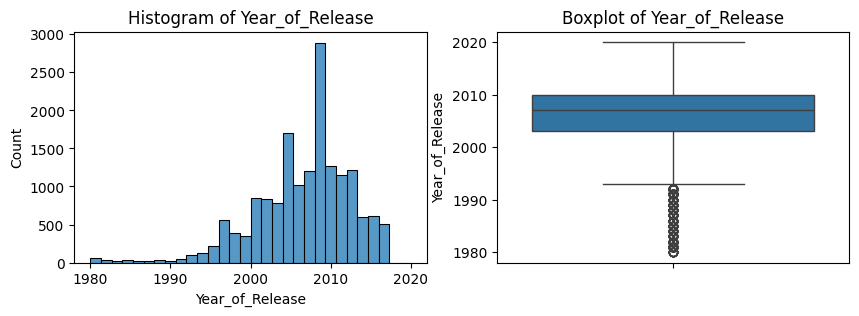

Year_of_Release- skewness: -0.975384412544011
Year_of_Release- kurtosis: 1.7749642529231062


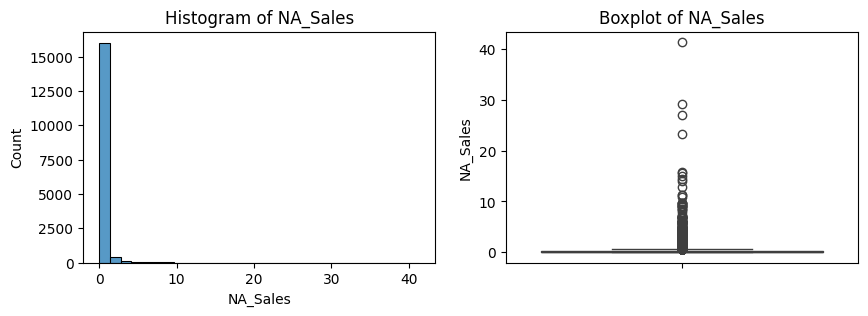

NA_Sales- skewness: 18.47951304163858
NA_Sales- kurtosis: 632.2597333642092


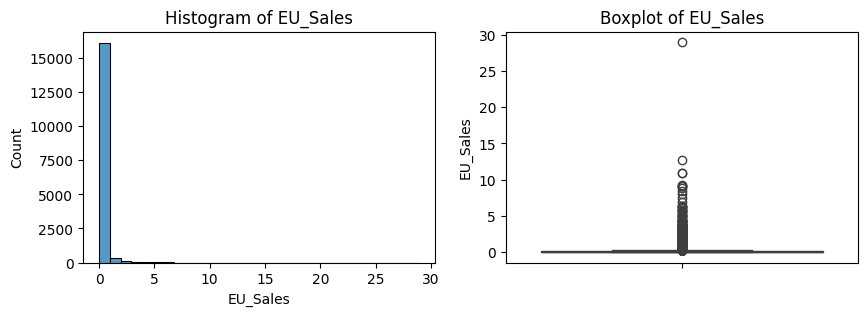

EU_Sales- skewness: 18.448880846545283
EU_Sales- kurtosis: 729.4966702335739


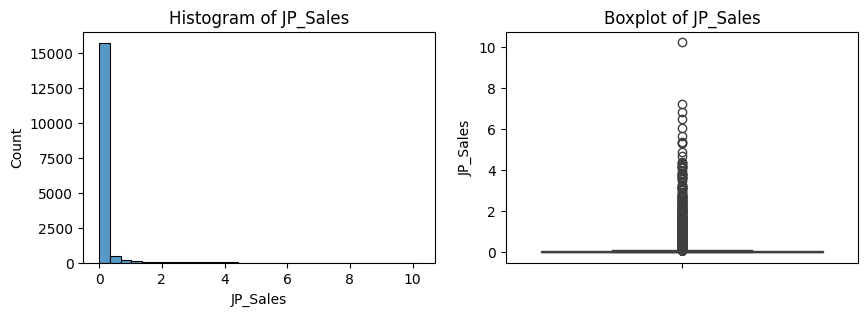

JP_Sales- skewness: 11.040428118744588
JP_Sales- kurtosis: 189.3211679687366


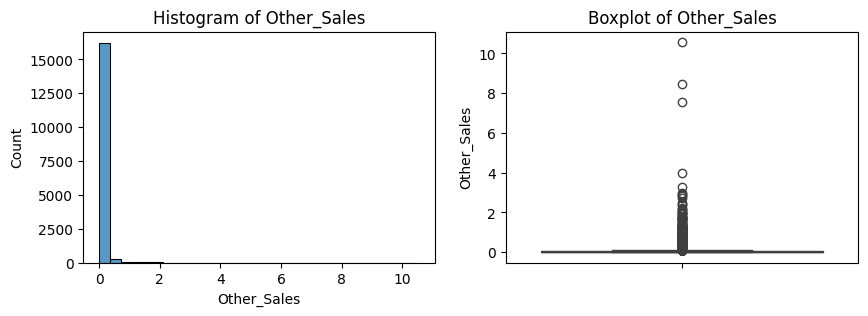

Other_Sales- skewness: 24.210256117616943
Other_Sales- kurtosis: 1029.468644875372


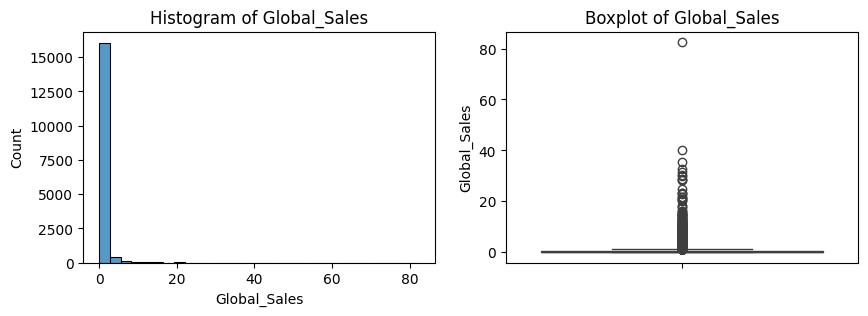

Global_Sales- skewness: 17.038141675080343
Global_Sales- kurtosis: 584.9854689546845


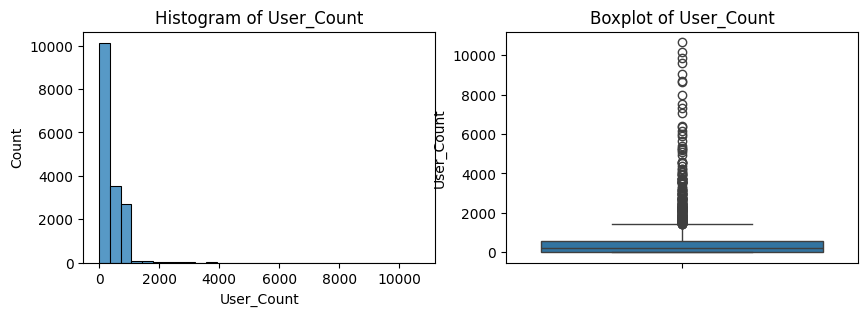

User_Count- skewness: 6.629350444124615
User_Count- kurtosis: 96.89978958446166


In [696]:
def dist_plot(df, numerical_cols):
  for i in numerical_cols:
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    sns.histplot(df[i], bins=30)
    plt.title(f"Histogram of {i}")

    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")

    plt.show()

    print(f"{i}- skewness: {df[i].skew()}")
    print(f"{i}- kurtosis: {df[i].kurt()}")

dist_plot(df[numerical],numerical)


- Outliers are present in all numerical columns but will not be removed as they are logical given each game’s unique characteristics and distribution.


**Graph Insights:**
- Most games were released between 2004 and 2010.
- The maximum number of players can reach 10,000, but most games have 0-1,000 players.
- Total sales can reach 15 million.

### Distribution of Categorial Data

In [697]:
for i in category:
  print(df[i].value_counts(), '\n')

Name
Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
LEGO Jurassic World              9
Madden NFL 07                    9
FIFA 14                          9
                                ..
Hooked! Real Motion Fishing      1
.hack//G.U. Vol.2//Reminisce     1
Hello Kitty Seasons              1
Bicycle Casino 2005              1
Haitaka no Psychedelica          1
Name: count, Length: 11397, dtype: int64 

Platform
PS2     2153
DS      2133
PS3     1333
Wii     1303
X360    1250
PS      1207
PSP     1200
PC       959
XB       810
GBA      803
GC       550
3DS      522
PSV      433
PS4      399
N64      322
XOne     253
SNES     242
SAT      175
WiiU     148
2600     119
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64 

Genre
Action          3346
Sports          2338
Misc            1720
Role-Playing    1501
Shooter         1320
Adventure       


- `Name`:
  - The most frequent game is "Need for Speed: Most Wanted" with 12 occurrences.
  
- `Platform`:
  - Popular platforms like PS2 and DS dominate, while older or less common platforms have smaller representations.
  
- `Genre`:
  - The most popular genre is Action, followed by Sports. Puzzle games are less popular.

- `Publisher`:
  - Major publishers like EA and Activision dominate, while most others contribute minimally.


## Summary of Findings and Anomalies

**Anomalies:**
1. `User_Score`: Data type issue due to string values.
2. `Year_of_Release`: Illogical values (1-10) for a year column.
3. `User_Count`: Negative values despite significant game sales.

**Key Findings:**
- Most games were released between 2004 and 2010.
- Maximum players can reach 10,000, with most games having 0-1,000 players.
- Total sales can reach 15 million.
- Most frequent game: "Need for Speed: Most Wanted."
- Popular platforms: PS2 and DS.
- Popular genre: Action.
- Popular publishers: EA and Activision.

## Build Recommender System

### Make Soup Feature

In [698]:
game= df.copy()

In [699]:
game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,322.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,706.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,709.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,192.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,92.0


- Copied the DataFrame as a backup.

Columns used for the model:
- Name, Genre, Platform, Publisher, Global_Sales, User_Count.


In [700]:
scaler= MinMaxScaler()
game[['Global_Sales', 'User_Count']] = scaler.fit_transform(game[['Global_Sales', 'User_Count']])

game['Global_Sales']= game['Global_Sales'].astype(str)
game['User_Count']= game['User_Count'].astype(str)

- Scaled `Global_Sales` and `User_Count` using MinMaxScaler (0-1 range).

In [701]:
def create_soup(row):
    name = ' '.join([row['Name']] * 3) if row['Name'] else ''
    genre = ' '.join([row['Genre']] * 3) if row['Genre'] else ''

    platform = ' '.join([row['Platform']] * 2) if row['Platform'] else ''
    publisher = ' '.join([row['Publisher']] * 2) if row['Publisher'] else ''

    global_sales = row['Global_Sales'] if row['Global_Sales'] else ''
    user_count = row['User_Count'] if row['User_Count'] else ''

    return f"{name} {genre} {platform} {publisher} {global_sales} {user_count}"

game['soup'] = game.apply(create_soup, axis=1)

- Combined features into a single string:
  - `Name` and `Genre` replicated 3 times for higher weight.
  - `Platform` and `Publisher` replicated 2 times for moderate weight.
  - `Global_Sales` and `User_Count` included without replication.

In [702]:
print(game['soup'].iloc[0])

Wii Sports Wii Sports Wii Sports Sports Sports Sports Wii Wii Nintendo Nintendo 1.0 0.03010127531882971


### TF-IDF

In [703]:
tfidf= TfidfVectorizer(stop_words='english')
tfidf_matrix= tfidf.fit_transform(game['soup'])


- Used `TfidfVectorizer` to convert the combined feature column into numerical values, emphasizing unique words per game using TF-IDF. Added `stop_words='english'` to ignore common words like "the" or "and". The end result is a matrix of numbers, where each game is like a vector. This matrix will later be used to measure similarities between games with cosine similarity, which is the basis of my recommendation system.


### Cosine similarity

In [704]:
cosine_sim= cosine_similarity(tfidf_matrix, tfidf_matrix)

- Calculated similarity using the TF-IDF matrix.

### Build Model

In [705]:
indices= pd.Series(game.index, index=game['Name'])

In [706]:
def get_recommendations_system(name, top_n=5, cosine_sim=cosine_sim):
    idx = indices[name]
    sim_scores = cosine_sim[idx]
    sim_scores = [(i, sim) for i, sim in enumerate(sim_scores)]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    game_indices = [i[0] for i in sim_scores]
    return game[['Name', 'Genre', 'Platform', 'Publisher', 'Global_Sales', 'User_Count']].iloc[game_indices]

- The model calculates the similarity scores of a reference game with all other games, sorts them in descending order to find the games with the highest similarity scores, and excludes the reference game itself.

- The model provides 5 similar and relevant game recommendations, along with details such as genre, platform, publisher, global sales, and user count.

## Evaluate Model

In [707]:
example_game= "Wii Sports Resort"

print("Rekomendasi game:")
hasil= get_recommendations_system(example_game, top_n=5)
hasil

Rekomendasi game:


,Name,Genre,Platform,Publisher,Global_Sales,User_Count
0,Wii Sports,Sports,Wii,Nintendo,1.0,0.03010127531882971
4875,Fishing Resort,Sports,Wii,Namco Bandai Games,0.0046049442559379546,0.0006564141035258815
5058,Wii Sports Club,Sports,WiiU,Nintendo,0.00448376151236064,0.009846211552888224
12880,Kid Fit Island Resort,Sports,Wii,Avanquest,0.00048473097430925844,0.08280195048762191
2156,PilotWings Resort,Simulation,3DS,Nintendo,0.011391177896267571,0.008158289572393099




The model recommends games like Fishing Resort (similar in genre and platform), Wii Sports Club, and PilotWings Resort. These results demonstrate that the model captures similarities based on genre (Sports), platform (Wii and 3DS), and other attributes like publisher (Nintendo).

In [708]:
example_game= "Duck Hunt"

print("Rekomendasi game:")
hasil= get_recommendations_system(example_game, top_n=5)
hasil

Rekomendasi game:


,Name,Genre,Platform,Publisher,Global_Sales,User_Count
9244,In the Hunt,Shooter,PS,THQ,0.0015753756665050898,0.020348837209302327
13802,Looney Tunes Duck Dodgers Starring: Daffy Duck,Platform,N64,Infogrames,0.0003635482307319438,0.038447111777944486
7134,Deadly Duck,Shooter,2600,20th Century Fox Video Games,0.002544837615123606,0.05795198799699925
1851,Jungle Hunt,Platform,2600,Atari,0.013208919049927291,0.023818454613653416
11652,Ultimate Duck Hunting,Sports,Wii,Zoo Digital Publishing,0.0008482792050412022,0.06001500375093774


For Duck Hunt, the model recommends games such as In the Hunt, Looney Tunes Duck Dodgers, and Deadly Duck. The system identifies similarities in the game's theme (hunting/shooting) and its name.

In [709]:
example_game= "Super Mario Land"

print("Rekomendasi game:")
hasil= get_recommendations_system(example_game)
hasil

Rekomendasi game:


,Name,Genre,Platform,Publisher,Global_Sales,User_Count
189,Super Mario Land 3: Wario Land,Platform,GB,Nintendo,0.06277266117304897,0.010596399099774945
53,Super Mario 3D Land,Platform,3DS,Nintendo,0.13087736306349976,0.086271567891973
201,Super Mario Bros.,Platform,GB,Nintendo,0.06131846825012119,0.01669167291822956
50,Super Mario Land 2: 6 Golden Coins,Adventure,GB,Nintendo,0.13536112457586041,0.0503563390847712
167,Super Mario World,Platform,GBA,Nintendo,0.06604459524963646,0.03891597899474869


The model performs exceptionally well for Super Mario Land, recommending games like Super Mario 3D Land and Super Mario Bros, which are part of the same franchise and share similar genres and platforms. This demonstrates the model’s effectiveness in identifying clear connections within the same game series.

## Summary


The recommender system is quite effective in providing relevant game suggestions, particularly for games with clear and popular attributes, such as Wii Sports Resort and Super Mario Land, where the recommendations include games from similar genres, platforms, or franchises. Overall, the model performs well.